# Chapter 7: Matrix Examples

# 7.1 Geometric transformations 

**rotation matrix** 

\begin{align}
R &= \begin{bmatrix}
cos(\theta) & -sin(\theta) \\
sin(\theta) & cos(\theta) \\
\end{bmatrix}
\end{align}

In [46]:
# rotation matrix (ex. pi/3 - 60 deg)
using LinearAlgebra

Rot(theta) = [cos(theta) -sin(theta); sin(theta) cos(theta)];
R = Rot(pi/3);
R


2×2 Matrix{Float64}:
 0.5       -0.866025
 0.866025   0.5

In [55]:
points = [ [1,0], [1.5,0], [2,0], [1,0.25], [1.5, 0.25], [1,.5] ];
points_mat = [[c[1] for c in points]'; [c[2] for c in points]']

2×6 Matrix{Float64}:
 1.0  1.5  2.0  1.0   1.5   1.0
 0.0  0.0  0.0  0.25  0.25  0.5

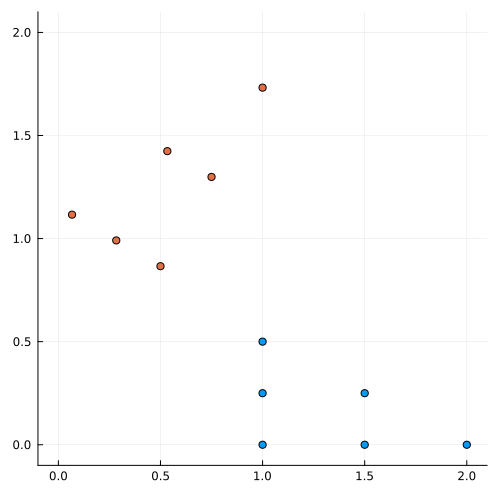

In [48]:
points = [ [1,0], [1.5,0], [2,0], [1,0.25], [1.5, 0.25], [1,.5] ];
rotated_points = [R*p for p in points];
using Plots

scatter([c[1] for c in points], [c[2] for c in points])
scatter!([c[1] for c in rotated_points], [c[2] for c in rotated_points])
plot!(lims=(-.1,2.1), size=(500,500), legend=false)

# 7.2 Selectors 

**reverser matrix** can be created by reversing the order of its rows (can use Julia function `reverse`). Multiplying a vector with a reverser matrix is the same as reversing the order of its entries directly. 

In [51]:
eye(n) = 1.0*Matrix(I,n,n)
reverser(n) = reverse(eye(n), dims=1) # dims tells which dimension to reverse (dims=1 reverses rows, dims=2 reverses columns)
A = reverser(5)


5×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0

In [52]:
x = [1., 2., 3., 4., 5.];
A*x # Reverse x by multiplying with reverser matrix.

5-element Vector{Float64}:
 5.0
 4.0
 3.0
 2.0
 1.0

In [53]:
reverse(x) # Reverse x directly.

5-element Vector{Float64}:
 5.0
 4.0
 3.0
 2.0
 1.0

**permutation matrix** is a specific type of selector matrix that can be used to permute the entries of a vector. (Note: we do not need to od this in Julia since we can do the same effect by directly passing in the permuted indexes to the vector)

In [1]:
A = [0 0 1; 
     1 0 0; 
     0 1 0]
x = [0.2, -1.7, 2.4]
A*x # Permutes entries of x to [x[3],x[1],x[2]]

3-element Vector{Float64}:
  2.4
  0.2
 -1.7

In [2]:
x[[3,1,2]] # Same thing using permuted indices

3-element Vector{Float64}:
  2.4
  0.2
 -1.7

## 7.3 Incidence matrix 

an **incidence matrix** of a *directed* graph with a set of nodes $1,\dots,n$  and a set of directed edges labeled $1,\dots,m$.

A directed graph can be described by its $n \times m$ incidence matrix, defined as:
\begin{align}
A_{ij} &= \begin{cases} 
 \mathbin{\phantom{-}}1 & \text{edge $j$ points to node $i$} \\
  -1 & \text{edge $j$ points from node $i$} \\
 \mathbin{\phantom{-}}0 & otherwise
          \end{cases} \\ 
\\
\\
A &= \begin{bmatrix}
    -1 & -1 & \mathbin{\phantom{-}}0 & \mathbin{\phantom{-}}1 & \mathbin{\phantom{-}}0 \\
    \mathbin{\phantom{-}}1 & \mathbin{\phantom{-}}0 & -1 & \mathbin{\phantom{-}}0 & \mathbin{\phantom{-}}0 \\
    \mathbin{\phantom{-}}0 & \mathbin{\phantom{-}}0 & \mathbin{\phantom{-}}1 & -1 & -1 \\
    \mathbin{\phantom{-}}0 & \mathbin{\phantom{-}}1 & \mathbin{\phantom{-}}0 & 0 & \mathbin{\phantom{-}}1 \\
     \end{bmatrix}
\end{align}

Above is the incidence matrix for the below graph:
<p align="center">
    <img src="image.png" width="500" >


In [3]:
A = [ -1 -1 0 1 0; 
       1 0 -1 0 0 ;
       0 0 1 -1 -1 ; 
       0 1 0 0 1]

4×5 Matrix{Int64}:
 -1  -1   0   1   0
  1   0  -1   0   0
  0   0   1  -1  -1
  0   1   0   0   1

In [9]:
# flow conservation
xcirc = [1, -1, 1, 0, 1] # a circulation (flow conservation)
A*xcirc # should be all 0s

4-element Vector{Int64}:
 0
 0
 0
 0

In [11]:
# flow conservation with sources (approximate model of power grid)

s = [1,0,-1,0]; # A source vector
x = [0.6, 0.3, 0.6, -0.1, -0.3]; # A flow vector
A*x + s # this should result in 0s

4-element Vector{Float64}:
 1.1102230246251565e-16
 0.0
 0.0
 0.0

**Dirichlet energy** measures the potential differences across the edges to say if the potentials of connected vertices are near each other or not. 

\begin{align}
D(v) &= ||A^Tv||^2\\
D(v) &= \sum_{edges (k,l)} (v_l - v_k)^2
\end{align} 

In [13]:
using LinearAlgebra
vsmooth = [ 1, 2, 2, 1 ]
norm(A'*vsmooth)^2  # Dirichlet energy of vsmooth

2.9999999999999996

In [15]:
vrough = [ 1, -1, 2, -1 ]
norm(A'*vrough)^2 # Dirichlet energy of vrough

27.0

## 7.4 Convolution

Julia's `DSP` package includes a convolution function `conv`.
\
More specifically, `conv(a,b)` computes the convolution of the vectors `a` and `b`. 

Let's use this to find the coefficients of the polynomial:

$p(x) = (1+x)(2-x+x^2)(1+x-2x^2) = 2 + 3x - 3x^2 - x^3 + x^4 - 2x^5$

In [20]:
using DSP 
a = [1,1]
b = [2,-1,1]
c = [1,1,-2]

d = conv(conv(a,b),c) # matches the coefficients !

6-element Vector{Int64}:
  2
  3
 -3
 -1
  1
 -2

**Toeplitz matrix** $T(a)$ also performs a convolution :

\begin{align}
a * b &= T(b)a = T(a)b \\ 
\\ 
\\

T(b)_{ij} &= \begin{cases} 
b_{i-j+1} & 1 \leq i-j+1 \leq m \\
0 & otherwise
\end{cases}
\end{align}

Wiith $n=4$ and $m=3$, we have: 

\begin{align}
T(b) &= \begin{bmatrix}
    b_1 & 0 & 0 & 0 \\
    b_2 & b_1 & 0 & 0 \\
    b_3 & b_2 & b_2 & 0 \\
    0 & b_3 & b_2 & b_1 \\
    0 & 0 & b_3 & b_2 \\
    0 & 0 & 0 & b_3 \\
     \end{bmatrix}, & 
     T(a) &= \begin{bmatrix}
    a_1 & 0 & 0  \\
    a_2 & a_1 & 0 \\
    a_3 & a_2 & a_1 \\
    a_4 & a_3 & a_2  \\
    0 & a_4 & a_3 \\
    0 & 0 & a_4 \\
     \end{bmatrix}
\end{align} 


In [22]:
function toeplitz(b,n)
    m = length(b)
    T = zeros(n+m-1, n)
    for i=1:m # add coefficients bi one by one using single indexing 
        T[i:n+m:end] .= b[i] # indices of b[i] are i, i+m+n, i+2(m+n), i+(n-1)(m+n)
    end
    return T
end

b = [-1,2,3]; a = [-2,3,-1,1]
Tb = toeplitz(b, length(a))

6×4 Matrix{Float64}:
 -1.0   0.0   0.0   0.0
  2.0  -1.0   0.0   0.0
  3.0   2.0  -1.0   0.0
  0.0   3.0   2.0  -1.0
  0.0   0.0   3.0   2.0
  0.0   0.0   0.0   3.0

In [23]:
Tb*a, conv(b,a)

([2.0, -7.0, 1.0, 6.0, -1.0, 3.0], [2, -7, 1, 6, -1, 3])

In [25]:
# time comparison , Julia's conv is very efficient 

m = 2000; n = 2000;
b = randn(n); a = randn(m);
@time ctoep = toeplitz(b,m)*a;
@time cconv = conv(b,a);

  0.056732 seconds (4.00 k allocations: 61.203 MiB, 80.41% gc time)
  0.000115 seconds (23 allocations: 157.750 KiB)


In [27]:
norm(ctoep-cconv) # should have very low value (close to 0, since ctoep and cconv should result in the same)

2.590842600359077e-12

### Exercise 7.15 *Channel equalization*

We suppose that $u_1, \dots , u_m$ is a signal (time series) that is transmitted (for example by radio). A receiver receives the signal $y = c*u$, where the n-vector $c$ is called the channel impulse response. In most applications $n$ is small, e.g., under 10, and $m$ is much larger. An equalizer is a k-vector $h$ that satisfies $h * c \approx e_1$, the first unit vector of length $n + k − 1$. The receiver equalizes the received signal $y$ by
convolving it with the equalizer to obtain $z = h * y$.

1. How are $z$ (the equalized received signal) and $u$ (the original transmitted signal) related? Hint. Recall that $h * (c * u) = (h * c) * u$
2. Numerical example. Generate a signal $u$ of length $m = 50$, with each entry a random value that is either −1 or +1. Plot $u$ and $y = c * u$, with $c = (1, 0.7, −0.3)$. Also plot the equalized signal $z = h * y$, with $h = (0.9, −0.5, 0.5, −0.4, 0.3, −0.3, 0.2, −0.1).$

In [17]:
u = rand([-1,1],50)
c = [1, 0.7, −0.3]

3-element Vector{Float64}:
  1.0
  0.7
 -0.3

In [31]:
# import Pkg; Pkg.add("DSP")

In [32]:
using DSP
y = conv(c,u)

52-element Vector{Float64}:
  1.0
 -0.30000000000000016
 -2.0
  0.6000000000000003
  2.0
 -0.6000000000000002
  0.0
  2.0
 -0.5999999999999999
 -2.0
  ⋮
 -0.6
 -1.9999999999999996
 -1.4
 -1.4
  0.6
  0.0
 -2.0
 -0.40000000000000013
  0.30000000000000004

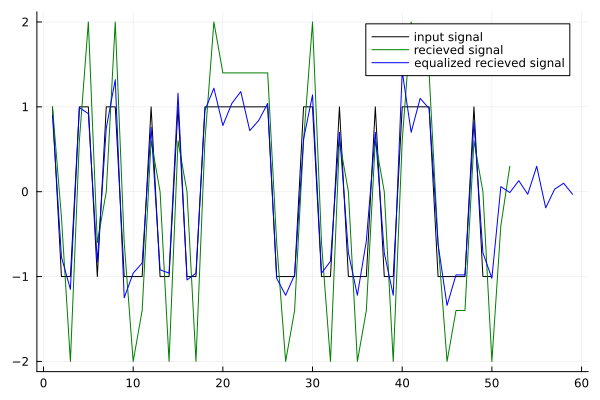

In [43]:
using Plots

plot(u, label="input signal", color="black")
plot!(y, label="recieved signal", color="green")
h = [0.9, −0.5, 0.5, −0.4, 0.3, −0.3, 0.2, −0.1]
z = conv(h,y)
plot!(z, label="equalized recieved signal", color="blue")

In [34]:
conv(h,c)

10-element Vector{Float64}:
  0.8999999999999999
  0.12999999999999992
 -0.12000000000000005
  0.09999999999999995
 -0.13000000000000006
  0.02999999999999995
 -0.1
  0.13
 -0.13000000000000003
  0.030000000000000013

In [35]:
conv([1,0,-1],[2,1,-1])

5-element Vector{Int64}:
  2
  1
 -3
 -1
  1